Hypothesis:
 - increased N2 amplitude in relation to inhibition of smoking-related stimuli reflecting better inhibitory mechanisms (Go/NoGo task);
 

In [1]:
%matplotlib inline

import mne
from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

from config import (fname,
                    subject_ids, 
                    sessions, 
                    subj_interv, 
                    subj_control, 
                     all_evokeds_interv_1_gng, 
                     all_evokeds_interv_2_gng, 
                     all_evokeds_control_1_gng, 
                     all_evokeds_control_2_gng)

import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

/home/claire/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Compute grand average ERP for each group and session

In [2]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_gng(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))


        for idx, evoked in enumerate(evokeds):
            evoked.apply_baseline((None, 0))

            if subj in subj_interv:
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_interv_1_gng)
                    all_evokeds_interv_1_gng[idx].append(evoked)
                    
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_interv_2_gng)
                    all_evokeds_interv_2_gng[idx].append(evoked)
                
            elif subj in subj_control:
    
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_control_1_gng)
                    all_evokeds_control_1_gng[idx].append(evoked)
                
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_control_2_gng)
                    all_evokeds_control_2_gng[idx].append(evoked)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-146/ses-1/eeg//sub-146_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-185/ses-1/eeg//sub-185_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 68 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 74 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 183 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-278/ses-2/eeg//sub-278_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline cor

        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this d

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-375/ses-1/eeg//sub-375_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...    

        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 205 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-487/ses-2/eeg//sub-487_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compens

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 183 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode

        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-577/ses-1/eeg//sub-577_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector speci

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mod

        nave = 205 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-667/ses-2/eeg//sub-667_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the met

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mod

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-726/ses-1/eeg//sub-726_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline co

        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 53 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline corre

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-754/ses-2/eeg//sub-754_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...   

N2 component following a Nogo Smoking Cue trial (N2= min at 150-300ms)
----------------------

compute the difference between intervention and control group, then compare T1 and T2

In [ ]:
 mne.grand_average(all_evokeds_interv_2_gng[0]).get_peak(tmin=0.150, tmax=0.300, mode='neg',   return_amplitude=True) 

channel


latency

amplitude

In [3]:
# diff between interv and control at t1
nogo_smok_diff_t1=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1_gng[0]), 
                                     mne.grand_average(all_evokeds_control_1_gng[0])], 
                                    weights=(1, -1)).apply_baseline(None, 0)

# diff between interv and control at t2
nogo_smok_diff_t2=mne.combine_evoked([mne.grand_average(all_evokeds_interv_2_gng[0]), 
                                     mne.grand_average(all_evokeds_control_2_gng[0])], 
                                    weights=(1, -1)).apply_baseline(None, 0)


# interv - diff between t1 and t2
nogo_smok_interv_diff=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1_gng[0]), 
                                     mne.grand_average(all_evokeds_interv_2_gng[0])], 
                                    weights=(1, -1)).apply_baseline(None, 0)

# control - diff between t1 and t2
nogo_smok_control_diff=mne.combine_evoked([mne.grand_average(all_evokeds_control_1_gng[0]), 
                                     mne.grand_average(all_evokeds_control_2_gng[0])], 
                                    weights=(1, -1)).apply_baseline(None, 0)


Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [54]:
all_evokeds_interv_1_gng[0]

[<Evoked  |  'nogo-smoking cue' (average, N=70), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=76), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=75), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=74), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=75), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=77), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=77), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=74), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=65), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=70), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=79), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking cue' (average, N=70), [-0.5, 0.6] sec, 1 ch, ~34 kB>,
 <Evoked  |  'nogo-smoking c

Intervention group at T1 and T2 - NoGo Smok

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


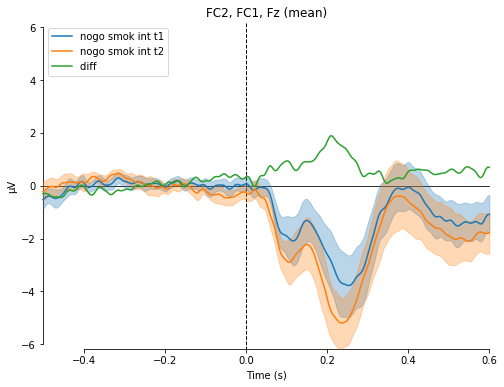

[<Figure size 576x432 with 1 Axes>]

In [24]:
mne.viz.plot_compare_evokeds(
                {'nogo smok int t1':all_evokeds_interv_1_gng[0], 
                 'nogo smok int t2':all_evokeds_interv_2_gng[0], 
                 'diff ': nogo_smok_interv_diff  }, 
                picks=[ 'FC2', 'FC1', 'Fz'],
                 combine='mean', 
                 ci=.95
                )

Identifying common channels ...


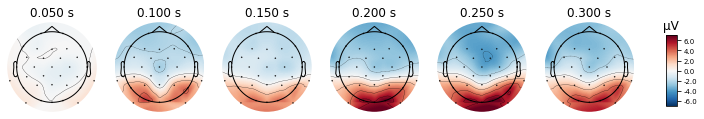

Identifying common channels ...


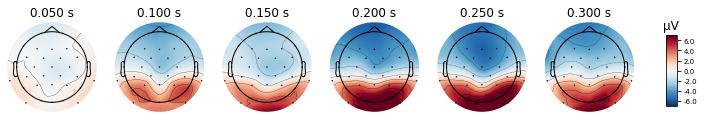

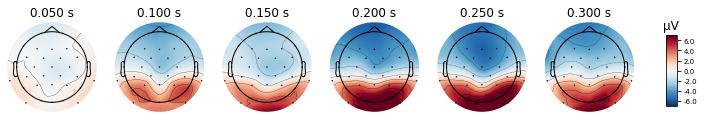

In [32]:
times = np.arange(0.05, 0.350, 0.05)
mne.grand_average(all_evokeds_interv_1_gng[0]).plot_topomap(times, vmin=-7, vmax=7)
mne.grand_average(all_evokeds_interv_2_gng[0]).plot_topomap(times, vmin=-7, vmax=7)

Identifying common channels ...


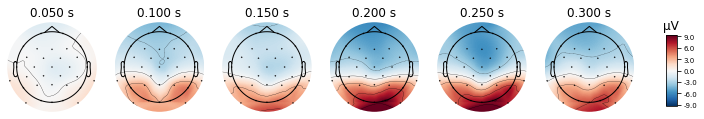

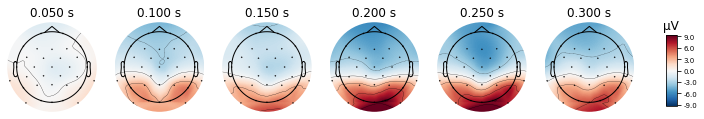

In [ ]:
Control group at T1 and T2 - NoGo Smok

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


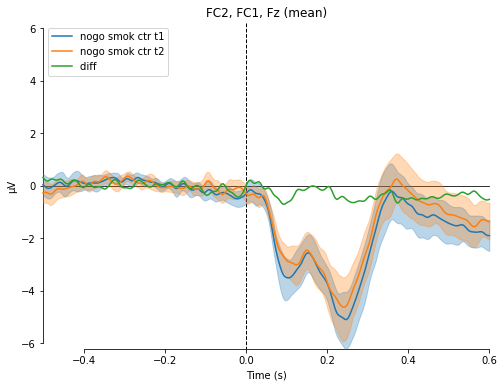

[<Figure size 576x432 with 1 Axes>]

In [23]:
mne.viz.plot_compare_evokeds(
                {'nogo smok ctr t1':all_evokeds_control_1_gng[0], 
                 'nogo smok ctr t2':all_evokeds_control_2_gng[0], 
                 'diff ': nogo_smok_control_diff  }, 
                picks=[ 'FC2', 'FC1', 'Fz'],
                 combine='mean', 
                 ci=.95
                )

Identifying common channels ...


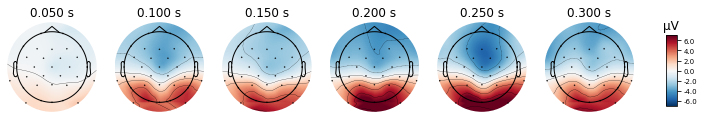

Identifying common channels ...


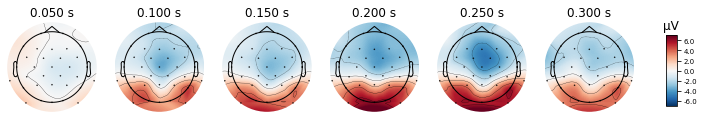

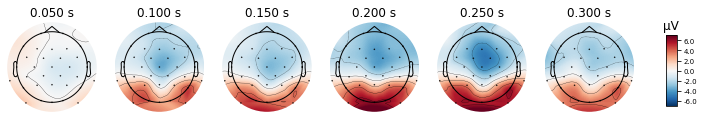

In [33]:
times = np.arange(0.05, 0.350, 0.05)
mne.grand_average(all_evokeds_control_1_gng[0]).plot_topomap(times, vmin=-7, vmax=7)
mne.grand_average(all_evokeds_control_2_gng[0]).plot_topomap(times, vmin=-7, vmax=7)

Difference between intervention and control at T1

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


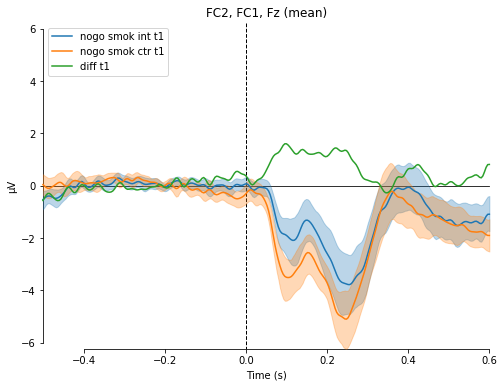

[<Figure size 576x432 with 1 Axes>]

In [25]:
mne.viz.plot_compare_evokeds(
                {'nogo smok int t1':all_evokeds_interv_1_gng[0], 
                 'nogo smok ctr t1':all_evokeds_control_1_gng[0], 
                 'diff t1': nogo_smok_diff_t1  }, 
                picks=[ 'FC2', 'FC1', 'Fz'],
                 combine='mean', 
                 ci=.95
                )

Difference between intervention and control at T2

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


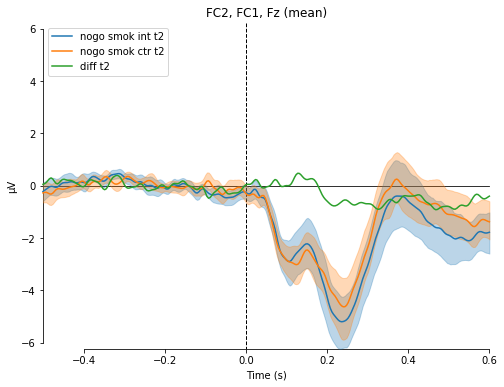

[<Figure size 576x432 with 1 Axes>]

In [6]:
mne.viz.plot_compare_evokeds(
                {'nogo smok int t2':all_evokeds_interv_2_gng[0], 
                 'nogo smok ctr t2':all_evokeds_control_2_gng[0], 
                 'diff t2': nogo_smok_diff_t2  }, 
                picks=[ 'FC2', 'FC1', 'Fz'],
               #picks=['Pz'],
                 combine='mean', 
                 ci=.95
                )

Stats - N2 amplitude - taking individual minimal N2 amplitude on Fz
-------------------------------------------------------------------------------------------------

Gets individual minimal amplitude for N2

In [8]:
def get_ind_peak(evoked_list, tmin, tmax, elec):
    all_peak_amplitude=[]
    all_peak_latency=[]
    all_channel=[]

    for idx, erp in enumerate(evoked_list):


            # get peak latency and amplitude
            channel,  latency, amplitude= erp.pick(elec).get_peak(tmin=tmin, tmax=tmax,
                                                       mode='neg',  
                                                       return_amplitude=True) 
            all_channel.append(channel)
            all_peak_amplitude.append(amplitude)
            all_peak_latency.append(latency)
    return(all_peak_amplitude, all_peak_latency)

In [9]:
peak_amp_n2_interv_1, peak_lat_n2_interv_1 =get_ind_peak(all_evokeds_interv_1_gng[0],
                                                         tmin=0.150, tmax=0.300, elec='Fz')
peak_amp_n2_interv_2, peak_lat_n2_interv_2 =get_ind_peak(all_evokeds_interv_2_gng[0],
                                                         tmin=0.150, tmax=0.300, elec='Fz')

peak_amp_n2_control_1, peak_lat_n2_control_1 =get_ind_peak(all_evokeds_control_1_gng[0],
                                                         tmin=0.150, tmax=0.300, elec='Fz')
peak_amp_n2_control_2, peak_lat_n2_control_2 =get_ind_peak(all_evokeds_control_2_gng[0],
                                                         tmin=0.150, tmax=0.300, elec='Fz')

In [10]:
all_n2_amp= {'ctr1':peak_amp_n2_control_1, 'int1':peak_amp_n2_interv_1,
             'ctr2':peak_amp_n2_control_2, 'int2':peak_amp_n2_interv_2 }

In [11]:
df_n2=pd.DataFrame(all_n2_amp, dtype=float)

df_n2['Subject']=df_n2.index

# convert to long format
df_n2_long=pd.wide_to_long(df_n2,['ctr', 'int'], i ='Subject', j='Session')

df_n2_long=pd.melt(df_n2_long.reset_index(), id_vars=['Subject', 'Session'],
                  value_vars=['ctr', 'int'], 
                  var_name='Groupe',
                  value_name='Fz')

In [15]:
df_n2_long

,Subject,Session,Groupe,Fz
0,0,1,ctr,-0.000008
1,1,1,ctr,-0.000008
2,2,1,ctr,-0.000003
3,3,1,ctr,-0.000009
4,4,1,ctr,-0.000008
...,...,...,...,...
83,17,2,int,-0.000004
84,18,2,int,-0.000005
85,19,2,int,-0.000007
86,20,2,int,-0.000004


In [18]:
pg.normality(df_n2_long, group='Groupe', dv='Fz')

,W,pval,normal
ctr,0.932996,0.013292,False
int,0.991613,0.985399,True


In [20]:
?pg.normality

Text(0.5, 1.0, 'N2 amplitude on Fz')

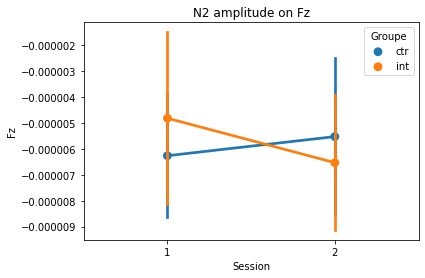

In [19]:
fig = sns.pointplot(data=df_n2_long, x= 'Session', y='Fz', ci='sd', hue='Groupe')

fig.set_title('N2 amplitude on Fz')

In [50]:
df_n2_long.to_csv('min_amp_n2.csv')

In [51]:
df_n2_long

,Subject,Session,Groupe,Fz
0,0,1,ctr,-0.000008
1,1,1,ctr,-0.000008
2,2,1,ctr,-0.000003
3,3,1,ctr,-0.000009
4,4,1,ctr,-0.000008
...,...,...,...,...
83,17,2,int,-0.000004
84,18,2,int,-0.000005
85,19,2,int,-0.000007
86,20,2,int,-0.000004


([<matplotlib.axis.XTick at 0x7f4efc218510>,
 <a list of 2 Text xticklabel objects>)

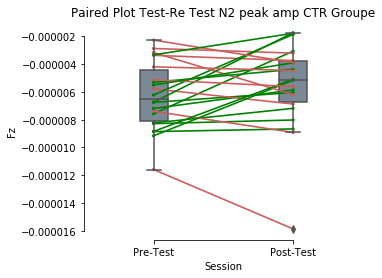

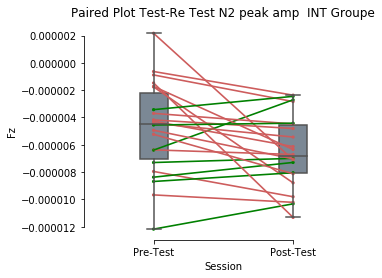

In [52]:
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4)) 

df_ctr=df_n2_long.query("Groupe == 'ctr'")
ctr_plot=pg.plot_paired(data=df_ctr, dv='Fz', within='Session', 
                        subject= 'Subject', ax=ax1)
 
plt.title('Paired Plot Test-Re Test N2 peak amp CTR Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4)) 

df_int=df_n2_long.query("Groupe == 'int'")
int_plot = pg.plot_paired(data=df_int, dv='Fz', within='Session',
                          subject= 'Subject', ax=ax2)

plt.title('Paired Plot Test-Re Test N2 peak amp  INT Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

Stats - N2 amplitude - taking average over N2 time window
---------------------------------------------------------------------------------------

In [30]:
elecs= ['Fz'] # centroparietal electrodes (no CPz on montage)
index=['time']
all_df=[]

for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_gng(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))
        
        nogo_smok_evo=evokeds[0]
        df=[]
        
        
        
        
        
        df=nogo_smok_evo.to_data_frame(index=index)[elecs]
        df['Subject']=str(subj)
        df['Session']= str(sess)    
        
        if subj in subj_interv:
            df['Groupe'] = 'int'

        elif subj in subj_control:
            df['Groupe'] = 'ctr'
        
        
        all_df.append(df)

# concatenate all dataframe
all_df=pd.concat(all_df)

#reset index to get time in a column
all_df = all_df.reset_index()

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-146/ses-1/eeg//sub-146_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-271/ses-2/eeg//sub-271_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-279/ses-2/eeg//sub-279_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-339/ses-2/eeg//sub-339_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-487/ses-1/eeg//sub-487_ses

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-545/ses-1/eeg//sub-545_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying basel

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-577/ses-1/eeg//sub-577_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline corr

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-608/ses-1/eeg//sub-608_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 191 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 71 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-703/ses-2/eeg//sub-703_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 190 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 193 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-743/ses-2/eeg//sub-743_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-753/ses-2/eeg//sub-753_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

In [31]:
all_df

channel,time,Fz,Subject,Session,Groupe
0,-500,-0.583182,146,1,int
1,-496,-0.581989,146,1,int
2,-492,-0.496177,146,1,int
3,-488,-0.326003,146,1,int
4,-484,-0.159649,146,1,int
...,...,...,...,...,...
24283,584,-1.161116,786,2,int
24284,588,-1.147017,786,2,int
24285,592,-1.178648,786,2,int
24286,596,-1.185740,786,2,int


In [32]:
all_df['Subject']=all_df.Subject.astype('str')
all_df['Session']=all_df.Session.astype('str')
all_df['Groupe']=all_df.Groupe.astype('str')

In [33]:
# select the N2 time window
all_df_n2 = all_df[(all_df['time']>=150) & (all_df['time']<=300)]

In [34]:
all_df_n2

channel,time,Fz,Subject,Session,Groupe
163,152,-6.034454,146,1,int
164,156,-6.162460,146,1,int
165,160,-6.437503,146,1,int
166,164,-6.813402,146,1,int
167,168,-7.169077,146,1,int
...,...,...,...,...,...
24208,284,-2.257482,786,2,int
24209,288,-2.393020,786,2,int
24210,292,-2.373701,786,2,int
24211,296,-2.287572,786,2,int


In [36]:
pg.normality(all_df_n2, group='Groupe', dv='Fz')

,W,pval,normal
int,0.992033,7.085829e-08,False
ctr,0.967491,5.907189e-19,False


Text(0.5, 1.0, 'N2 amplitude on Fz')

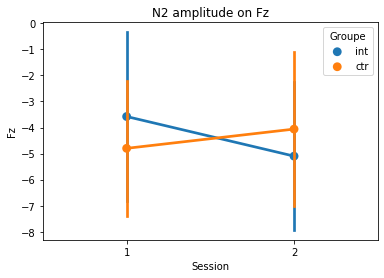

In [60]:
fig = sns.pointplot(data=all_df_n2, x= 'Session', y='Fz', ci='sd', hue='Groupe')

fig.set_title('N2 amplitude on Fz')

taking the dataframe out to analyze in R using WSR2 package

In [61]:
all_df_n2.to_csv('amp_n2_nogo_smok.csv')